In [1]:
#https://rise.readthedocs.io/en/stable/usage.html

2

# Tutorial Goals
In this tutorial we will analyze our own Google Search History Takeouts to gain insights on 1) what we could potentially learn from this data source and 2) what the practical challenges of gathering data would be.

# Personal data downloads / takeouts
- Came about due to [GDPR](https://gdpr.eu/what-is-gdpr/)
- Allows researchers to partner with individuals - data donation approach
- Still subject to the data formatting of platforms which could change any time
- Can be confusing for participants to accomplish
- Can be hard hard for participants to see what data they are donating (and thus provide *informed* consent)

# Personal data downloads / takeouts
- HUGE advantage over other approaches, device agnostic - anywhere one is logged into the platform the data are collected
- Historical approach avoids '[hawthorn](https://en.wikipedia.org/wiki/Hawthorne_effect) / observation' effects issues
- Single platform - depends how concentrated individuals are to a single platform -- Google Search is widely used and [the search engine market overall is highly concentrated](https://gs.statcounter.com/search-engine-market-share)

# Introductions
- Depending on what introductions we have already done in the main session: 
    - Name
    - Title
    - University
    - Your interest in takeouts/search traces
    - Any prior experience with related approaches or data?

# How to download your search history from Google
- Go to [https://takeout.google.com/settings/takeout/custom/my_activity](https://takeout.google.com/settings/takeout/custom/my_activity)
- Click "multiple formats" and change from HTML to JSON and click OK
<img src="json.png" alt="json" width="400"/>
- Click the "All activity data included" button, Deselect all, then check only Search (you may need to scroll)

- At the bottom of the page click "Next Step"
- Click "Create export"

# How to download your search history from Google

- The Export Progress message will say it could take hours or days to complete, but it will only take a few minutes.
- You can view your export in progress: [https://takeout.google.com/takeout/downloads](https://takeout.google.com/takeout/downloads) you'll see it available for download soon. You may need to refresh the page.
- Click Download

# How to follow along in Python
- If you already know how to clone a github repository and open an ipynb file, here is the repository link: https://github.com/erickaakcire/explore_google_takeout
- If not I will show you how to open it in Google Colab (no need to install python, etc.). **Everyone can follow along!**

1. Login to Google and go to https://drive.google.com/ - at AU, make sure to login to Google using your **NON-AU account** or you will not be able to create a colab notebook.
2. Create a new Google Colab document by going to New > More > Google Colabratory
    - If you have not created a Google Colab document before you won't see Google Colabratory, go to "Connect more apps" and choose Google Colabratory first.
    - When you have done this you have created a new blank ipynb python file on Googles servers
3. Now we need to import the ipynb file into your new Google Colab document. Go to File > Upload Notebook > click the Github tab. Enter this Github URL: https://github.com/erickaakcire/explore_google_takeout
    - It will find the one ipynb file, then just click on it to load it.

# Load your json file into Pandas
- On Google Colab, first upload the MyActivity.json file that you find in the Search folder to Google Colab. 
- Click on the folder icon on the left, which will open up a file view where you can drag your file. 

- To get the path of this file, click the three dots menu on the right of the file and choose "copy path" then just paste what you have inside the quotation marks in the cell below.

![google colab image](google_colab_1.png)

In [3]:
import pandas as pd
#df = pd.read_json("/content/MyActivity.json")
#df = pd.read_json("/content/demo.json")
df = pd.read_json("demo.json")

df.head()

,header,title,titleUrl,time,products,activityControls,locationInfos
0,Search,Visited Math Games | Math Playground | Fun for...,https://www.google.com/url?q=https://www.mathp...,2022-09-01T20:33:41.108Z,[Search],[Web & App Activity],NaN
1,Search,Searched for math playground,https://www.google.com/search?q=math+playground,2022-09-01T20:33:37.841Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http..."
2,Search,Searched for math,https://www.google.com/search?q=math,2022-09-01T20:33:00.196Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http..."
3,Search,Visited Google Search,https://www.google.com,2022-09-01T20:32:46.321Z,[Search],[Web & App Activity],NaN
4,Search,Visited https://chevychasekids.dentist/,https://www.google.com/url?q=https://chevychas...,2022-09-01T20:09:37.925Z,[Search],[Web & App Activity],NaN


# Goal

## Display frequent search terms (unigrams) (overall, by month)

1. "searched for" and "visited" record types must be distinguished
2. Extract the month/year as a variable
3. Lower case the title field, take out punctuation, split by space to create a clean search words array
4. Remove stop words for your language(s)
5. Group by month and view the top X words per month

# First, general exploration

In [4]:
df.tail()

,header,title,titleUrl,time,products,activityControls,locationInfos
23,Search,Visited http://sinosphere.blogs.nytimes.com/20...,https://www.google.com/url?q=http://sinosphere...,2014-04-03T08:20:26.348Z,[Search],[Web & App Activity],NaN
24,Search,Visited http://en.wikipedia.org/wiki/Bo_Xilai,https://www.google.com/url?q=http://en.wikiped...,2014-04-03T08:20:22.179Z,[Search],[Web & App Activity],NaN
25,Search,Visited http://www.bbc.com/news/world-asia-chi...,https://www.google.com/url?q=http://www.bbc.co...,2014-04-03T08:20:20.328Z,[Search],[Web & App Activity],NaN
26,Search,Searched for bo xilai,https://www.google.com/search?q=bo+xilai,2014-04-03T08:20:11.424Z,[Search],[Web & App Activity],NaN
27,Search,Searched for 10 megabytes in bytes,https://www.google.com/search?q=10+megabytes+i...,2014-04-02T14:39:42.060Z,[Search],[Web & App Activity],NaN


In [5]:
df.shape

(28, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   header            28 non-null     object
 1   title             28 non-null     object
 2   titleUrl          28 non-null     object
 3   time              28 non-null     object
 4   products          28 non-null     object
 5   activityControls  28 non-null     object
 6   locationInfos     10 non-null     object
dtypes: object(7)
memory usage: 1.7+ KB


# 'time' is not a timestamp!

In [7]:
df['time'] = pd.to_datetime(df['time'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   header            28 non-null     object             
 1   title             28 non-null     object             
 2   titleUrl          28 non-null     object             
 3   time              28 non-null     datetime64[ns, UTC]
 4   products          28 non-null     object             
 5   activityControls  28 non-null     object             
 6   locationInfos     10 non-null     object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 1.7+ KB


In [8]:
df.describe()

/var/folders/3g/s_fz7w8j73b8ksc4116pztwc0000gn/T/ipykernel_33463/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,header,title,titleUrl,time,products,activityControls,locationInfos
count,28,28,28,28,28,28,10
unique,1,28,28,27,1,1,4
top,Search,Visited Math Games | Math Playground | Fun for...,https://www.google.com/url?q=https://www.mathp...,2022-09-01 20:09:20.999000+00:00,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http..."
freq,28,1,1,2,28,28,6
first,NaN,NaN,NaN,2014-04-02 14:39:42.060000+00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-09-01 20:33:41.108000+00:00,NaN,NaN,NaN


# Three columns have only 1 value

# We only need two columns for this example

In [9]:
df = df[['title','time']]

In [10]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df.head()

,title,time,year,month
0,Visited Math Games | Math Playground | Fun for...,2022-09-01 20:33:41.108000+00:00,2022,9
1,Searched for math playground,2022-09-01 20:33:37.841000+00:00,2022,9
2,Searched for math,2022-09-01 20:33:00.196000+00:00,2022,9
3,Visited Google Search,2022-09-01 20:32:46.321000+00:00,2022,9
4,Visited https://chevychasekids.dentist/,2022-09-01 20:09:37.925000+00:00,2022,9


# We just need searches, not visits

In [11]:
df['search_terms'] = df['title'].str.extract(r'Searched for (.*)', expand=False)

In [12]:
df = df.loc[(df['search_terms'].notnull())]
df.head()

,title,time,year,month,search_terms
1,Searched for math playground,2022-09-01 20:33:37.841000+00:00,2022,9,math playground
2,Searched for math,2022-09-01 20:33:00.196000+00:00,2022,9,math
5,Searched for chevy chase pediatric dentist,2022-09-01 20:09:20.999000+00:00,2022,9,chevy chase pediatric dentist
8,Searched for markdown beginner tutorial,2022-09-01 18:12:25.606000+00:00,2022,9,markdown beginner tutorial
10,Searched for count words sql,2021-09-25 19:38:50.255000+00:00,2021,9,count words sql


In [13]:
!pip install nltk

In [14]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /Users/emt/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/emt/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
def tokenize(txt):
    words = word_tokenize(txt)
    return words

df['term_tokenized'] = df.apply(lambda row: tokenize(row['search_terms'].lower()), axis=1).copy()
df.tail()

,title,time,year,month,search_terms,term_tokenized
18,Searched for show correlation examples interac...,2019-05-26 21:13:30.340000+00:00,2019,5,show correlation examples interactive,"[show, correlation, examples, interactive]"
20,Searched for networkx visualization,2017-09-22 02:50:28.341000+00:00,2017,9,networkx visualization,"[networkx, visualization]"
22,Searched for networkx sort nodes by degree,2017-09-22 02:44:45.142000+00:00,2017,9,networkx sort nodes by degree,"[networkx, sort, nodes, by, degree]"
26,Searched for bo xilai,2014-04-03 08:20:11.424000+00:00,2014,4,bo xilai,"[bo, xilai]"
27,Searched for 10 megabytes in bytes,2014-04-02 14:39:42.060000+00:00,2014,4,10 megabytes in bytes,"[10, megabytes, in, bytes]"


In [16]:
#clean the data by taking out extremely common words in your language(s)

#List of stopwords
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [17]:
#take out stop words & punctuation

def rm_punct(all_words):
    #Empty list to store words:
    words_no_punct = []

    #Removing punctuation marks :
    for w in all_words:
        if w not in stopwords:
            if w.isalpha():
                words_no_punct.append(w.lower())
    return words_no_punct

df['term_cleaned'] = df.apply(lambda row: rm_punct(row['term_tokenized']), axis=1).copy()
df.tail()

,title,time,year,month,search_terms,term_tokenized,term_cleaned
18,Searched for show correlation examples interac...,2019-05-26 21:13:30.340000+00:00,2019,5,show correlation examples interactive,"[show, correlation, examples, interactive]","[show, correlation, examples, interactive]"
20,Searched for networkx visualization,2017-09-22 02:50:28.341000+00:00,2017,9,networkx visualization,"[networkx, visualization]","[networkx, visualization]"
22,Searched for networkx sort nodes by degree,2017-09-22 02:44:45.142000+00:00,2017,9,networkx sort nodes by degree,"[networkx, sort, nodes, by, degree]","[networkx, sort, nodes, degree]"
26,Searched for bo xilai,2014-04-03 08:20:11.424000+00:00,2014,4,bo xilai,"[bo, xilai]","[bo, xilai]"
27,Searched for 10 megabytes in bytes,2014-04-02 14:39:42.060000+00:00,2014,4,10 megabytes in bytes,"[10, megabytes, in, bytes]","[megabytes, bytes]"


# Select a random month

In [19]:
# get a specific month
df_test = df.loc[(df['month'] == 9) & (df['year'] == 2017) & (df['term_cleaned'].notnull())]
df_test

,title,time,year,month,search_terms,term_tokenized,term_cleaned
20,Searched for networkx visualization,2017-09-22 02:50:28.341000+00:00,2017,9,networkx visualization,"[networkx, visualization]","[networkx, visualization]"
22,Searched for networkx sort nodes by degree,2017-09-22 02:44:45.142000+00:00,2017,9,networkx sort nodes by degree,"[networkx, sort, nodes, by, degree]","[networkx, sort, nodes, degree]"


# For this month, glom all of the search terms together

In [20]:
list_of_lists = df_test.term_cleaned.tolist()
flat_list = [item for sublist in list_of_lists for item in sublist]
as_text = ' '.join(flat_list)

### Now we can see the most comon unigrams of the month

In [21]:
#Frequency distribution :
fdist = FreqDist(flat_list)

fdist.most_common(10)

[('networkx', 2),
 ('visualization', 1),
 ('sort', 1),
 ('nodes', 1),
 ('degree', 1)]

# No text data presentation is complete without...

In [ ]:
!pip install wordcloud

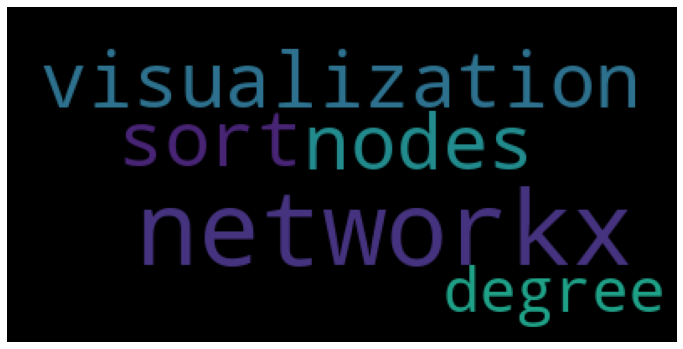

In [22]:
#Library to form wordcloud :
from wordcloud import WordCloud

#Library to plot the wordcloud :
import matplotlib.pyplot as plt

#Generating the wordcloud :
wordcloud = WordCloud().generate(as_text)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 
plt.show()

# Discuss
### What kinds of questions would you like to answer with this type of dataset?
### How can we incorporate this type of data into our research in an ethical and practical way?
### What kind of profile do you think Google would construct about you?
### How can you use this data to understand your own behavior?
    https://github.com/ccs-amsterdam/DigitalFootprintsLab